In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("../input/churndata1/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
np.unique(df.Gender)

array(['Female', 'Male'], dtype=object)

In [6]:
df['Geography'] = df['Geography'].str.replace('France','1')
df['Geography'] = df['Geography'].str.replace('Germany','2')
df['Geography'] = df['Geography'].str.replace('Spain','3')

df['Gender'] = df['Gender'].str.replace('Female','0')
df['Gender'] = df['Gender'].str.replace('Male','1')

In [7]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1


In [8]:
df['Geography'] = df['Geography'].astype(int)
df['Gender'] = df['Gender'].astype(int)

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

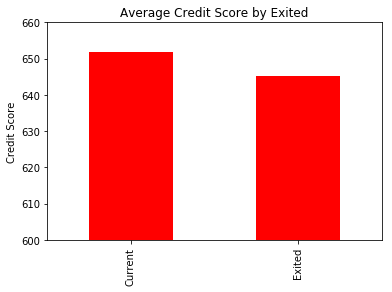

In [10]:
df.groupby(['Exited']).CreditScore.mean().plot.bar(color ='red')
plt.ylim(600,660)
plt.xticks([0,1],['Current','Exited'])
plt.title('Average Credit Score by Exited')
plt.xlabel('')
plt.ylabel('Credit Score')
plt.style.use('default')

Text(0, 0.5, 'Total Number')

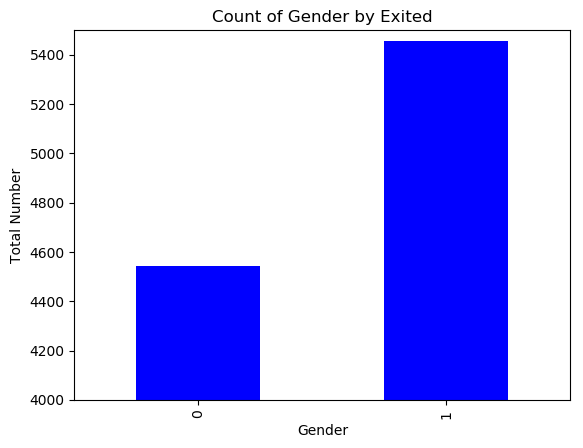

In [11]:
df.groupby(['Gender']).Exited.count().plot.bar(color ='blue')
plt.title('Count of Gender by Exited')
plt.ylim(4000,5500)
plt.ylabel('Total Number')

Text(0, 0.5, '')

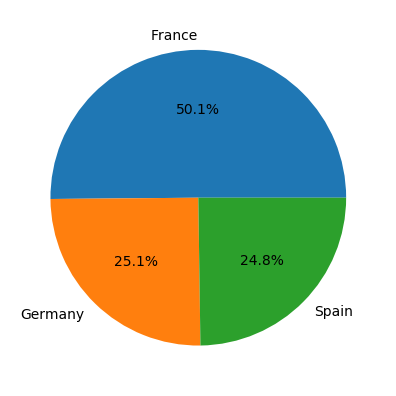

In [12]:
df.groupby(['Geography']).Exited.count().plot.pie(autopct='%.1f%%', labels = ['France','Germany','Spain'])
plt.ylabel('')

(900, 1050)

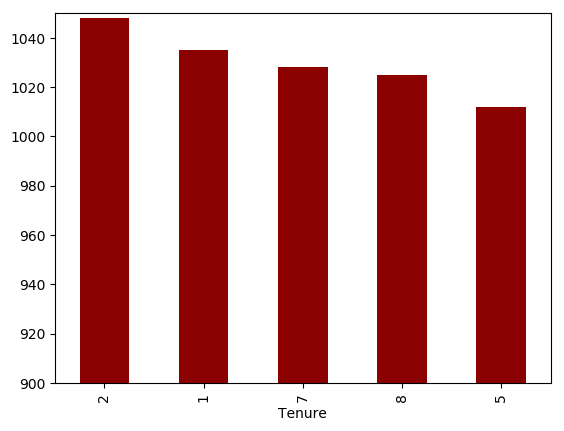

In [13]:
df.groupby(['Tenure']).Exited.count().sort_values(ascending=False).head().plot.bar(color ='darkred')
plt.ylim(900,1050)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']],df.Exited, test_size = 0.3, random_state = 1)

In [15]:
Model = LogisticRegression()
Model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
Model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
Model.score(X_test,y_test)

0.7863333333333333

In [18]:
Model.predict_proba(X_test)

array([[0.71344108, 0.28655892],
       [0.81429905, 0.18570095],
       [0.73318833, 0.26681167],
       ...,
       [0.81948523, 0.18051477],
       [0.84893785, 0.15106215],
       [0.83393148, 0.16606852]])

In [19]:
Model.coef_

array([[-4.82510009e-03, -1.07286370e-04, -1.89786125e-03,
         4.06702001e-02, -2.20455693e-03,  3.76101749e-06,
        -8.80296908e-04, -4.49443223e-04, -2.59259800e-03,
        -1.62933207e-06]])